# Overview:

The purpose of this project is to develop a face recognition model using the Olivetti faces dataset. Whilst that is the main purpose of the project, it is also to help me learn more about machine learning using algorithms like:
- K-Neighbours Classifier
- Making a PCA Transformer
- Support Vector Classifier

## Dataset

The dataset used in this assignment is the Olivetti faces dataset. This dataset contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. The ``sklearn.datasets.fetch_olivetti_faces`` function is the data fetching / caching function that downloads the data archive from AT&T.

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

Data Set Characteristics:

      Classes: 40
      Samples total: 400
      Dimensionality: 4096
      Features: real, between 0 and 1
    
The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms.

The `target` for this database is an integer from 0 to 39 indicating the identity of the person pictured; however, with only 10 examples per class, this relatively small dataset is more interesting from an unsupervised or semi-supervised perspective.

The original dataset consisted of 92 x 112, while the version available here consists of 64 x 64 images.

Details can be found from: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces


First, let's download the dataset:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_olivetti_faces

In [2]:
dataset = fetch_olivetti_faces()

Let's print the description:

In [3]:
print(dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
X = dataset.data
y = dataset.target

In [5]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

Let's show a random face:

In [6]:
def show_face(data):
    image = data.reshape(64, 64)
    plt.imshow(image, cmap = mpl.cm.gray, interpolation="nearest")
    plt.axis("off")

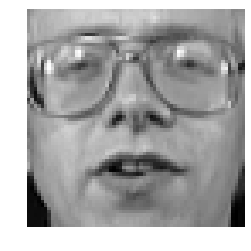

In [7]:
show_face(X[10])

## Questions and Code

**1. Randomly split `X` and `y` into 2 subsets for training (50%) and test (50%) so that the number of faces of each subject are the same in the training set. Use `random_state = 42`. [2 points]**

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

**2. Build the first face recoginition model by using the ``KNeighborsClassifier`` to find the best matching image in the training set of each of the images in the test set. Compute the test accuracy. Explain why accuaracy is a suitable metric in this case. [4 points]**

Document: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [9]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)
accuracy_score(y_test, y_predicted)

0.875

**3. Build a PCA transformer using the training set so that the amount of variance that needs to be explained is greater than 95%. Many components are obtained? [3 points]**

Document: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [11]:
n_components = pca.components_.shape[0]
print(n_components)

85


**4. Re-train the ``KNeighborsClassifier`` in Question 2 with the data obtained after using the PCA transformer in Question 3. Test with the test set and report the test accuracy. [3 points]**

In [12]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_reduced, y_train)

X_test_reduced = pca.transform(X_test)
y_predicted = clf.predict(X_test_reduced)

accuracy_score(y_test, y_predicted)

0.875

**5. Display in two columns all the wrong predicted images in the test set together with the nearest image found in the training set. [3 points]**

In [13]:
A = []
for i in range(len(y_test)):
    if y_predicted[i] != y_test[i]:
        idx = clf.kneighbors(X_test_reduced[i].reshape(-1, n_components), n_neighbors=1, return_distance=False)
        im_row = np.hstack((X_test[i].reshape(64,64), X_train[int(idx)].reshape(64,64)))
        A.append(im_row)

(-0.5, 127.5, 1599.5, -0.5)

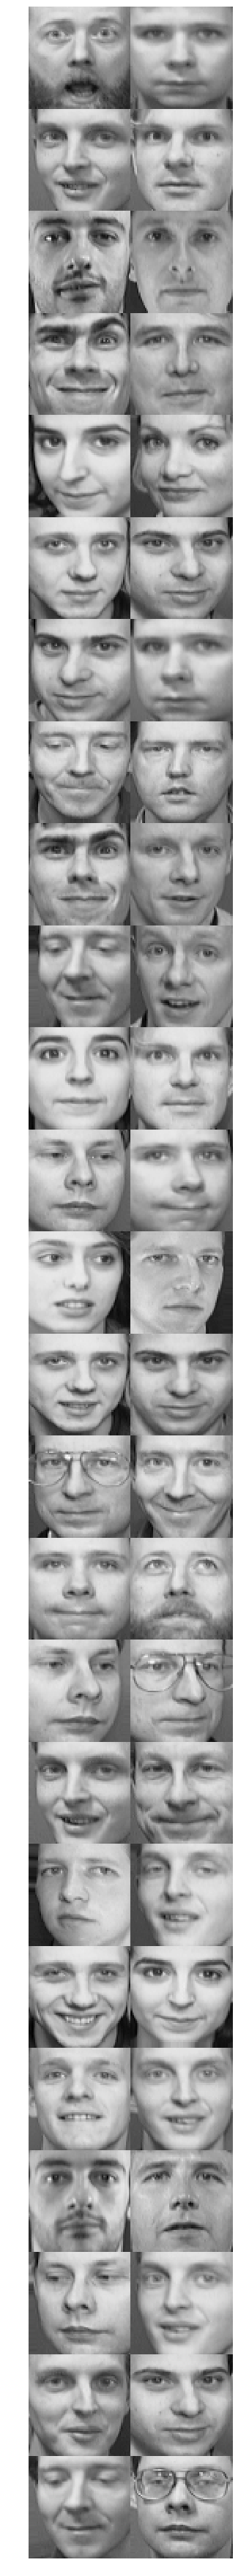

In [14]:
image = np.concatenate(A, axis=0)
plt.figure(figsize=(5, 5*len(A)))
plt.imshow(image, cmap = mpl.cm.gray, interpolation="nearest")
plt.axis("off")

**6. Repeat Question 4 using a ``C-Support Vector Classifier`` with a `RBF kernel` and parameters `C` and `gamma` are tuned in a `GridSearchCV` with 5 folds. [5 points]**

Documents:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5)
clf = clf.fit(X_train_reduced, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [16]:
y_predicted = clf.predict(X_test_reduced)
accuracy_score(y_test, y_predicted)

0.925